# Random Forest 

# Fraud_check dataset

In [1]:
# import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the data
fraud = pd.read_csv('/Users/Admin/Documents/data science assignment/Desicion Tree/Fraud_check.csv')

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# Converting the Taxable income variable to bucketing
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [5]:
# Droping the Taxable income variable
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [6]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [8]:
# Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [9]:
# collecting the column name
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [10]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(features,labels, test_size=0.2,stratify = labels)

# Building Random Forest model using Entropy 

In [11]:
from sklearn.ensemble import  RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score =True,criterion = 'entropy')
model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [12]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1955450541),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2101284060),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1508746317),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=909544820),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1614649258),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=970695256),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1493818458),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=709236873),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
         

In [13]:
model.classes_

array([0, 1])

In [14]:
model.n_features_

5

In [15]:
model.n_classes_

2

In [16]:
model.n_outputs_

1

In [17]:
model.oob_score_

0.73125

In [18]:
# Prediction on train data
prediction = model.predict(x_train)

In [19]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.9875

In [20]:
np.mean(prediction == y_train)

0.9875

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)
confusion

array([[381,   0],
       [  6,  93]], dtype=int64)

In [22]:
# prediction on test data
pred_test = model.predict(x_test)
pred_test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# Accuracy
acc_test = accuracy_score(y_test,pred_test)
acc_test

0.725

#### Taxable.Income accuracy for y_train is 98.75%  and y_test accracy is 72.5% 

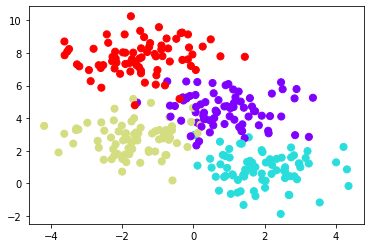

In [24]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

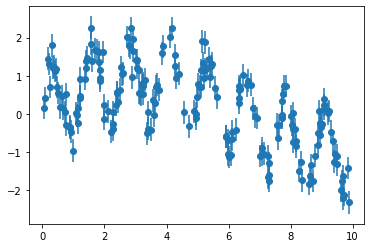

In [25]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

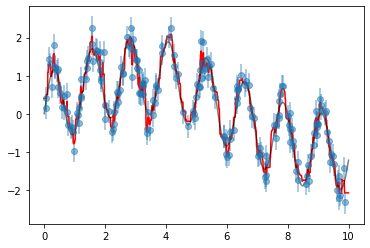

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);